## 데이터 및 라이브러리 로딩

In [1]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.4.3
설치 위치:  C:\Users\user\anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\user\.matplotlib
캐시 위치:  C:\Users\user\.matplotlib


## 데이터탐색

In [3]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [6]:
num_d = train['director'].value_counts()[train['director'].value_counts() >= 3]
num_d

홍상수       7
장률        4
신재호       4
우민호       4
노진수       4
전규환       4
전수일       3
신연식       3
박철수       3
오멸        3
김기덕       3
장진        3
권칠인       3
조성규       3
김현석       3
김조광수      3
김봉은       3
윤여창       3
정성복       3
조조 히데오    3
Name: director, dtype: int64

In [7]:
corr = train.corr()
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [8]:
corr['box_off_num']

time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

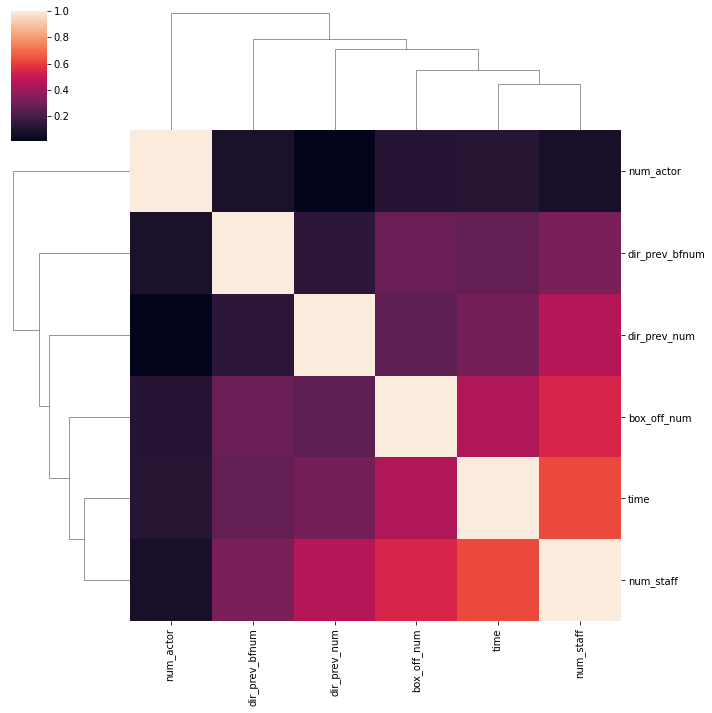

In [9]:
sns.clustermap(corr)

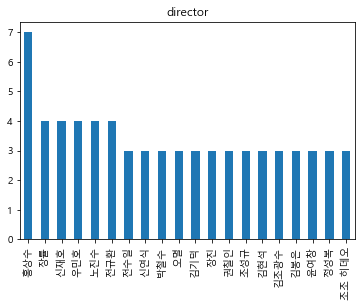

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'
num_d.plot(kind='bar')
plt.title('director')
plt.style.use(['seaborn'])
plt.show()

In [11]:
train[train['director'] == '장철수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [12]:
train[train['director'] == '구자홍']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866


In [13]:
train[train['director'] == '홍상수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
15,자유의 언덕,(주) 영화제작전원사,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,NaN,0,55,5,46212
164,지금은맞고그때는틀리다,(주)NEW,드라마,2015-09-24,121,청소년 관람불가,홍상수,39317.0,1,16,2,80734
331,다른나라에서,(주) 영화제작전원사,드라마,2012-05-31,89,청소년 관람불가,홍상수,NaN,0,70,2,31101
506,우리 선희,(주) 영화제작전원사,드라마,2013-09-12,89,청소년 관람불가,홍상수,NaN,0,8,6,69122
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122


In [14]:
train[train['director'] == '장률']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
246,풍경,인디스토리,다큐멘터리,2013-12-12,96,전체 관람가,장률,NaN,0,4,14,2178
349,필름시대사랑,(주)스마일이엔티,드라마,2015-10-22,70,15세 관람가,장률,NaN,0,94,4,1611
365,경주,인벤트 디,드라마,2014-06-12,145,15세 관람가,장률,NaN,0,85,4,63517
550,두만강,인디스토리,드라마,2011-03-17,93,15세 관람가,장률,NaN,0,22,3,2429


In [15]:
train[train['director'] == '신재호']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
179,응징자,인벤트 디,액션,2013-10-30,103,청소년 관람불가,신재호,44448.5,2,151,3,192347
367,치외법권,판씨네마(주),액션,2015-08-27,104,15세 관람가,신재호,93748.0,3,253,2,346483
563,웨딩스캔들,(주)마인스엔터테인먼트,멜로/로맨스,2012-09-06,90,15세 관람가,신재호,67602.0,1,57,2,21295
587,서유기 리턴즈,(주) 영화사조제,SF,2011-02-17,79,전체 관람가,신재호,67602.0,1,220,4,12696


In [16]:
train[train['director'] == '우민호']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
58,파괴된 사나이,시너지,공포,2010-07-01,114,청소년 관람불가,우민호,NaN,0,290,5,1012310
63,간첩,롯데엔터테인먼트,드라마,2012-09-20,115,15세 관람가,우민호,1012310.0,1,372,5,1310895
377,내부자들: 디 오리지널,(주)쇼박스,느와르,2015-12-31,180,청소년 관람불가,우민호,3131902.0,3,382,3,2084844


In [17]:
train[train['director'] == '노진수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
215,짓2: 붉은 낙타,드림팩트 엔터테인먼트,멜로/로맨스,2015-08-06,84,청소년 관람불가,노진수,NaN,0,44,3,808
368,친절한 가정부,BoXoo 엔터테인먼트,코미디,2015-02-26,75,청소년 관람불가,노진수,NaN,0,4,4,166
479,피해자들,골든타이드픽처스,드라마,2014-07-31,89,청소년 관람불가,노진수,NaN,0,81,2,494
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958


In [18]:
train[train['director'] == '전규환']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
284,모차르트 타운,트리필름,드라마,2011-09-15,90,청소년 관람불가,전규환,NaN,0,16,3,446
389,무게,NEW,드라마,2013-11-07,108,청소년 관람불가,전규환,NaN,0,13,2,1161
503,애니멀 타운,트리필름,드라마,2011-03-10,97,청소년 관람불가,전규환,NaN,0,1,2,1379
538,마이 보이,트리필름,드라마,2014-04-10,99,12세 관람가,전규환,NaN,0,117,4,3523


In [19]:
train[train['director'] == '전수일']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
45,콘돌은 날아간다,(주)마운틴픽쳐스,드라마,2013-05-30,102,청소년 관람불가,전수일,984.0,1,23,3,1209
392,영도다리,(주)마운틴픽쳐스,드라마,2010-07-01,81,청소년 관람불가,전수일,984.0,1,85,1,1693
411,핑크,(주)마운틴픽쳐스,드라마,2012-03-15,97,청소년 관람불가,전수일,984.0,1,49,2,971


In [20]:
train[train['director'] == '신연식']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
46,페어 러브,CJ 엔터테인먼트,드라마,2010-01-14,117,12세 관람가,신연식,NaN,0,106,2,27083
257,러시안 소설,KT&G 상상마당,드라마,2013-09-19,140,15세 관람가,신연식,NaN,0,29,2,5992
328,배우는 배우다,(주)NEW,드라마,2013-10-24,98,청소년 관람불가,신연식,NaN,0,196,2,112029


In [21]:
train[train['director'] == '박철수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
225,생생활활,(주)팝엔터테인먼트,드라마,2013-03-21,100,청소년 관람불가,박철수,NaN,0,38,6,294
370,녹색의자 2013 - 러브 컨셉츄얼리,(주)마운틴픽쳐스,멜로/로맨스,2013-10-31,97,청소년 관람불가,박철수,NaN,0,42,2,366
501,베드,(주)마운틴픽쳐스,멜로/로맨스,2013-01-17,91,청소년 관람불가,박철수,NaN,0,37,3,660


In [22]:
train[train['director'] == '오열']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [23]:
train[train['director'] == '김기덕']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
37,일대일,김기덕 필름,드라마,2014-05-22,122,청소년 관람불가,김기덕,NaN,0,135,2,10142
131,피에타,(주)NEW,드라마,2012-09-06,104,청소년 관람불가,김기덕,NaN,0,119,2,603283
571,뫼비우스,(주)NEW,드라마,2013-09-05,90,청소년 관람불가,김기덕,NaN,0,93,3,35348


In [24]:
train[train['director'] == '장진']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
30,로맨틱 헤븐,시네마서비스,드라마,2011-03-24,117,12세 관람가,장진,NaN,0,369,7,73729
273,퀴즈왕,시네마서비스,코미디,2010-09-16,121,15세 관람가,장진,NaN,0,273,13,573001
463,우리는 형제입니다,(주)쇼박스,코미디,2014-10-23,102,12세 관람가,장진,73729.0,1,357,4,970377


In [25]:
train[train['director'] == '권칠인']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
23,관능의 법칙,롯데엔터테인먼트,드라마,2014-02-13,108,청소년 관람불가,권칠인,75740.0,1,288,3,781516
55,원더풀 라디오,(주)쇼박스,드라마,2012-01-05,120,15세 관람가,권칠인,75740.0,1,279,2,986287
270,참을 수 없는,시너지,멜로/로맨스,2010-10-21,114,청소년 관람불가,권칠인,NaN,0,292,4,75740


In [26]:
train[train['director'] == '조성규']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
323,맛있는 인생,스폰지,드라마,2010-10-28,97,15세 관람가,조성규,NaN,0,66,2,900
406,내가 고백을 하면,(주)마인스엔터테인먼트,드라마,2012-11-15,100,15세 관람가,조성규,NaN,0,32,2,11969
546,설마 그럴리가 없어,(주) 영화사조제,드라마,2012-06-21,95,12세 관람가,조성규,NaN,0,23,2,1679


In [27]:
train[train['director'] == '김현석']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
297,시라노; 연애조작단,롯데엔터테인먼트,멜로/로맨스,2010-09-16,117,12세 관람가,김현석,1.158640e+06,2,342,8,2684798
360,쎄시봉,CJ 엔터테인먼트,멜로/로맨스,2015-02-05,122,15세 관람가,김현석,1.468216e+06,4,566,8,1715370
378,열한시,CJ 엔터테인먼트,공포,2013-11-28,99,15세 관람가,김현석,1.667359e+06,3,277,3,870785


In [28]:
train[train['director'] == '김조광수']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
36,원나잇 온리,(주)레인보우 팩토리,드라마,2014-07-03,67,청소년 관람불가,김조광수,NaN,0,1,5,2923
92,두 번의 결혼식과 한 번의 장례식,영화사 진진,코미디,2012-06-21,106,15세 관람가,김조광수,NaN,0,155,4,51120
528,귀,CJ 엔터테인먼트,공포,2010-06-10,109,15세 관람가,김조광수,NaN,0,255,13,13108


In [29]:
train[train['director'] == '김봉은']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
311,가자! 장미여관으로 2 - 갈증,에이블엔터테인먼트,멜로/로맨스,2014-04-10,87,청소년 관람불가,김봉은,NaN,0,27,4,3534
314,"가자, 장미여관으로",드림로드,멜로/로맨스,2014-10-08,85,청소년 관람불가,김봉은,NaN,0,26,2,1533
430,나는 야한 여자가 좋다 2,드림로드,멜로/로맨스,2014-10-01,80,청소년 관람불가,김봉은,3534.0,1,26,2,1250


In [30]:
train[train['director'] == '윤여장']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [31]:
train[train['director'] == '정성복']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
508,모차르트 락 오페라,SK플래닛,뮤지컬,2011-11-17,133,전체 관람가,정성복,NaN,0,4,4,16323


In [32]:
train[train['director'] == '조조 히데오']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
57,미궁: 비밀애,(주) 케이알씨지,멜로/로맨스,2015-04-23,69,청소년 관람불가,조조 히데오,NaN,0,1,4,514


In [33]:
train[train['director'].str.contains('홍상수')] #홍상수가 포함된 모든 셀이 나옴

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
15,자유의 언덕,(주) 영화제작전원사,드라마,2014-09-04,67,청소년 관람불가,홍상수,NaN,0,52,3,39317
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029
115,북촌방향,(주) 영화사조제,드라마,2011-09-08,79,청소년 관람불가,홍상수,NaN,0,55,5,46212
164,지금은맞고그때는틀리다,(주)NEW,드라마,2015-09-24,121,청소년 관람불가,홍상수,39317.0,1,16,2,80734
331,다른나라에서,(주) 영화제작전원사,드라마,2012-05-31,89,청소년 관람불가,홍상수,NaN,0,70,2,31101
506,우리 선희,(주) 영화제작전원사,드라마,2013-09-12,89,청소년 관람불가,홍상수,NaN,0,8,6,69122
523,옥희의 영화,스폰지,드라마,2010-09-16,80,청소년 관람불가,홍상수,NaN,0,57,3,37122


In [34]:
train_director = train[['director']] #, 'box_off_num'
train_director.head()

,director
0,조병옥
1,우민호
2,장철수
3,구자홍
4,신근호


In [35]:
one_hot_df = pd.get_dummies(train_director)
one_hot_df

,director_New Pistol,director_강석필,director_강성옥,director_강우석,director_강의석,director_강형철,director_강효진,director_강훈,director_경순,director_계윤식,...,director_홍원찬,director_홍재희,director_홍지영,director_황동혁,director_황병국,director_황석호,director_황욱,director_황유식,director_황인호,director_황철민
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_dir = one_hot_df.mean()
data_dir.head()

director_New Pistol    0.001667
director_강석필           0.001667
director_강성옥           0.001667
director_강우석           0.003333
director_강의석           0.001667
dtype: float64

In [37]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [38]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000
mean,109.798354,8.916695e+05,0.851852,159.316872,3.477366
std,124.022711,1.217341e+06,1.200321,162.976607,2.111192
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000
75%,114.500000,1.080850e+06,1.000000,282.000000,4.000000
max,2015.000000,6.173100e+06,6.000000,776.000000,16.000000


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [132]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 11)
(243, 10)
(243, 2)


In [40]:
corr = test.corr()
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
time,1.000000,0.089548,-0.008251,0.027539,0.069020
dir_prev_bfnum,0.089548,1.000000,0.243788,0.361844,0.001036
dir_prev_num,-0.008251,0.243788,1.000000,0.338003,-0.009482
num_staff,0.027539,0.361844,0.338003,1.000000,0.100680
num_actor,0.069020,0.001036,-0.009482,0.100680,1.000000


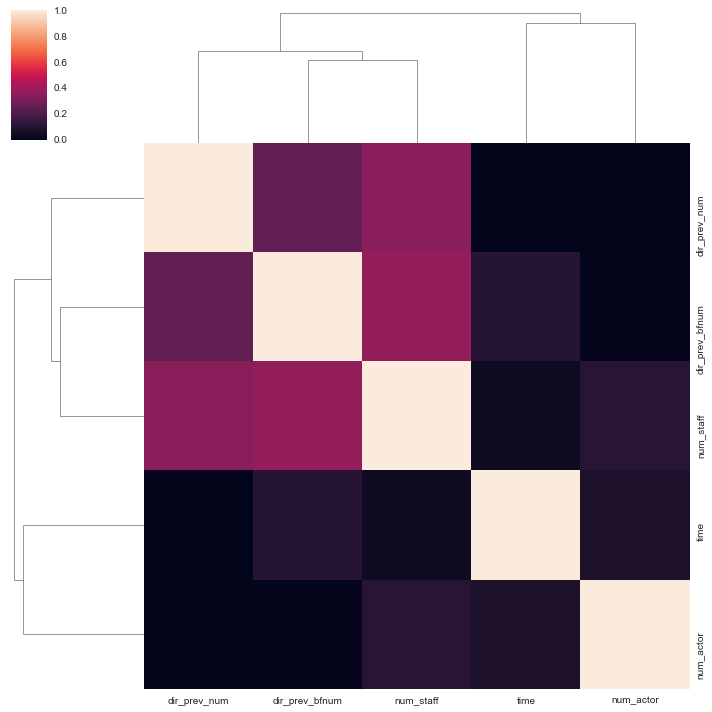

In [41]:
plt.style.use(['seaborn'])
sns.clustermap(corr)

In [42]:
num_t = test['director'].value_counts()[test['director'].value_counts() >= 2]
num_t

조성규    3
이정호    3
김형준    2
김태균    2
김미연    2
이준익    2
전규환    2
정재은    2
조정래    2
곽경택    2
민병훈    2
김진영    2
민규동    2
이한     2
정용기    2
김성훈    2
이병헌    2
권호영    2
김진만    2
이상우    2
장동홍    2
Name: director, dtype: int64

In [43]:
test[test['director'] == '조성규']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
180,산타바바라,나이너스엔터테인먼트(주),멜로/로맨스,2014-07-16,99,15세 관람가,조성규,NaN,0,143,3
215,플랑크 상수,하준사,드라마,2015-04-30,69,청소년 관람불가,조성규,NaN,0,64,4
237,어떤이의 꿈,하준사,드라마,2015-11-26,72,12세 관람가,조성규,NaN,0,29,3


In [44]:
test[test['director'] == '이정호']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
11,베스트셀러,시너지,미스터리,2010-04-15,117,15세 관람가,이정호,550284.0,1,319,1
109,굿바이 홈런,시네마 달,다큐멘터리,2013-02-14,84,전체 관람가,이정호,NaN,0,3,0
166,방황하는 칼날,CJ 엔터테인먼트,공포,2014-04-10,122,청소년 관람불가,이정호,980977.0,3,456,2


In [45]:
test[test['director'] == '김형준']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,300529.0,2,304,3
100,간기남,(주)쇼박스,공포,2012-04-11,117,청소년 관람불가,김형준,300529.0,2,248,6


In [46]:
test[test['director'] == '김태균']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
17,맨발의 꿈,쇼박스(주)미디어플렉스,드라마,2010-06-24,121,전체 관람가,김태균,NaN,0,329,2
98,"봄, 눈",(주)NEW,드라마,2012-04-26,109,전체 관람가,김태균,NaN,0,116,3


In [47]:
test[test['director'] == '김미연']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
181,나는 야한 여자가 좋다,(주) 케이알씨지,멜로/로맨스,2015-03-26,80,청소년 관람불가,김미연,NaN,0,11,2
194,나는 야한 여자가 좋다 3,(주) 케이알씨지,멜로/로맨스,2015-03-26,80,청소년 관람불가,김미연,NaN,0,11,2


In [48]:
test[test['director'] == '이준익']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
131,소원,롯데엔터테인먼트,드라마,2013-10-02,122,12세 관람가,이준익,NaN,0,207,3
221,사도,(주)쇼박스,드라마,2015-09-16,125,12세 관람가,이준익,4015364.0,1,463,3


In [49]:
test[test['director'] == '전규환']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
110,불륜의 시대,(주)키노아이,멜로/로맨스,2013-02-14,98,청소년 관람불가,전규환,NaN,0,5,4
208,성난 화가,트리필름,액션,2015-06-18,105,청소년 관람불가,전규환,NaN,0,73,2


In [50]:
test[test['director'] == '정재은']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
102,말하는 건축가,(주)두타연,다큐멘터리,2012-03-08,95,전체 관람가,정재은,160148.0,1,2,3
129,말하는 건축 시티:홀,(주)미디어데이,다큐멘터리,2013-10-24,106,전체 관람가,정재은,160148.0,1,9,1


In [51]:
test[test['director'] == '조정래']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
97,두레소리,명필름,드라마,2012-05-10,108,12세 관람가,조정래,NaN,0,43,6
217,파울볼,오퍼스픽쳐스,다큐멘터리,2015-04-02,87,전체 관람가,조정래,NaN,0,64,3


In [52]:
test[test['director'] == '곽경택']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
89,미운오리새끼,롯데엔터테인먼트,드라마,2012-08-30,95,15세 관람가,곽경택,700272.0,1,192,2
207,극비수사,(주)쇼박스,드라마,2015-06-18,108,15세 관람가,곽경택,1239067.0,3,374,2


In [53]:
test[test['director'] == '민병훈']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
82,터치,(주)팝엔터테인먼트,드라마,2012-11-08,99,청소년 관람불가,민병훈,NaN,0,169,2
223,사랑이 이긴다,리틀빅픽처스,드라마,2015-09-10,100,15세 관람가,민병훈,NaN,0,103,3


In [54]:
test[test['director'] == '김진영']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
66,위험한 상견례,롯데엔터테인먼트,멜로/로맨스,2015-04-29,119,15세 관람가,김진영,927659.0,4,372,5
76,음치 클리닉,롯데엔터테인먼트,멜로/로맨스,2012-11-29,124,12세 관람가,김진영,927659.0,4,268,2


In [55]:
test[test['director'] == '민규동']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
59,세상에서 가장 아름다운 이별,(주)NEW,드라마,2011-04-20,125,15세 관람가,민규동,NaN,0,333,7
212,간신,롯데엔터테인먼트,드라마,2015-05-21,131,청소년 관람불가,민규동,1.711110e+06,3,510,5


In [56]:
train[train['director'] == '이한']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num


In [57]:
test[test['director'] == '정용기']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
43,커플즈,싸이더스,코미디,2011-11-02,110,15세 관람가,정용기,1078306.0,2,41,5
71,가문의 귀환,롯데엔터테인먼트,코미디,2012-12-19,104,15세 관람가,정용기,NaN,0,274,13


In [58]:
test[test['director'] == '김성훈']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
40,량강도 아이들,Cinema SAM,드라마,2011-11-17,95,전체 관람가,김성훈,163194.0,1,131,9
141,마이 리틀 히어로,CJ 엔터테인먼트,드라마,2013-01-09,135,전체 관람가,김성훈,NaN,0,303,5


In [59]:
test[test['director'] == '이병헌']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
118,"힘내세요, 병헌씨",인디스토리,코미디,2013-06-27,94,15세 관람가,이병헌,NaN,0,42,5
195,스물,NEW,코미디,2015-03-25,115,15세 관람가,이병헌,NaN,0,463,3


In [60]:
test[test['director'] == '권호영']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,31738.0,1,380,1
115,사이코메트리,CJ 엔터테인먼트,미스터리,2013-03-07,108,청소년 관람불가,권호영,31738.0,1,280,2


In [61]:
test[test['director'] == '김진만']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
90,황제펭귄 펭이와 솜이,(주)마운틴픽쳐스,다큐멘터리,2012-08-08,79,전체 관람가,김진만,NaN,0,3,1


In [62]:
test[test['director'] == '이상우']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
12,작은 연못,노근리 프로덕션,액션,2010-04-15,86,15세 관람가,이상우,34.0,1,310,9
65,엄마는 창녀다,(주)드림웨스트픽쳐스,드라마,2011-03-31,96,청소년 관람불가,이상우,NaN,0,52,2


In [63]:
test[test['director'] == '장동홍']

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
210,혜경궁 홍씨,(주)마운틴픽쳐스,드라마,2015-06-04,134,12세 관람가,장동홍,NaN,0,0,3


In [64]:
train['box_off_num'].describe()

count    6.000000e+02
mean     7.081818e+05
std      1.828006e+06
min      1.000000e+00
25%      1.297250e+03
50%      1.259100e+04
75%      4.798868e+05
max      1.426277e+07
Name: box_off_num, dtype: float64

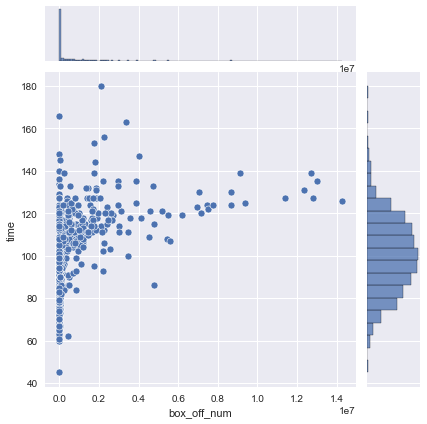

In [65]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='time', data=train)

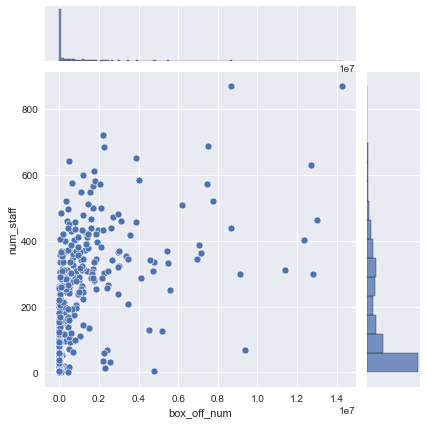

In [66]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='num_staff', data=train)

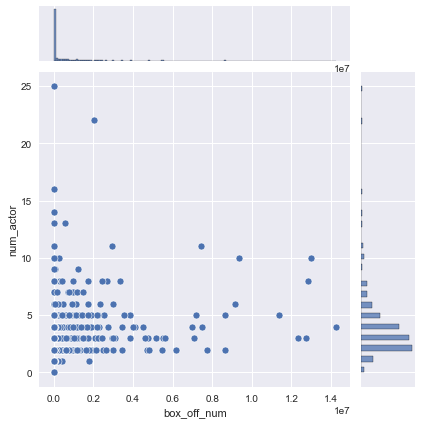

In [67]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='num_actor', data=train)

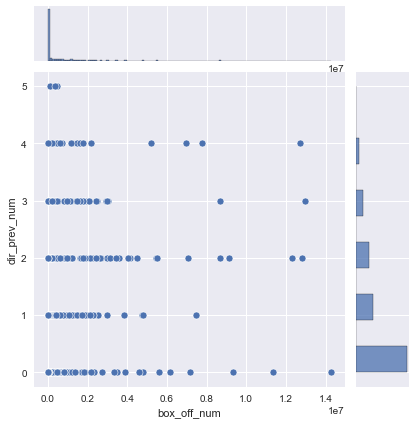

In [68]:
plt.style.use(['seaborn'])
sns.jointplot(kind='scatter', x='box_off_num', y='dir_prev_num', data=train)

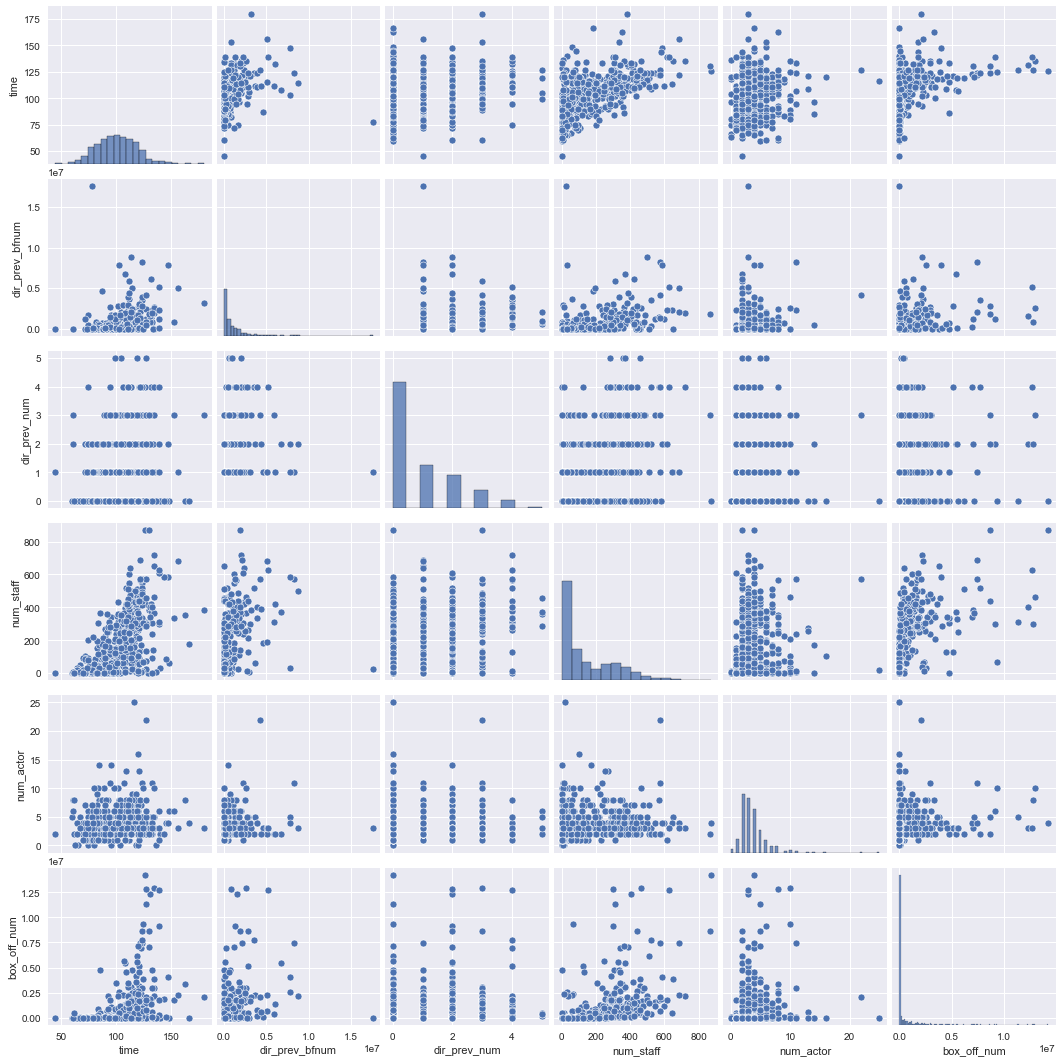

In [69]:
sns.pairplot(train)

In [70]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


In [71]:
pd.reset_option('display.float_format')
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


<AxesSubplot:>

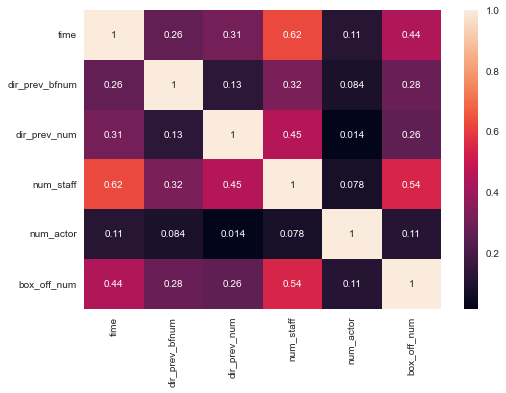

In [72]:
sns.heatmap(train.corr(), annot=True)

In [73]:
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [74]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [75]:
train['dir_prev_bfnum']

0             NaN
1      1161602.50
2       220775.25
3        23894.00
4            1.00
          ...    
595       3833.00
596     496061.00
597           NaN
598           NaN
599           NaN
Name: dir_prev_bfnum, Length: 600, dtype: float64

In [76]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [77]:
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [78]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

In [79]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

## 데이터 전처리

In [80]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [81]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [82]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [83]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))


In [84]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)


In [129]:
# 원핫 인코딩
X_train = pd.get_dummies(train)
y_test = pd.get_dummies(test)

## 모델정의 및 학습

In [130]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

xgb = XGBRegressor(random_state = 42)

gbr = GradientBoostingRegressor(random_state=42)

rf = RandomForestRegressor(random_state=42)

md_label = ['XGBRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor']

all_md = [xgb, gbr, rf]

all_rmse = []
for model, label in zip(all_md, md_label):
    model.fit(X_train, y_train)
    pred = np.expm1([0 if x<0 else x for x in model.predict(X_train)])

    all_rmse.append({f'{label}' : mean_squared_error(y_train, pred, squared=False)})

NameError: name 'y_train' is not defined

In [131]:
train['box_off_num']
test['num_staff']
X = train['box_off_num']
y = test['num_staff']

In [127]:
xgb_rgs = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_rgs.fit(X_train, y_train, eval_set = evals, eval_metric="mlogloss", early_stopping_rounds=400, verbose=False)

NameError: name 'X_test' is not defined

In [ ]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

In [126]:
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy

NameError: name 'X_test' is not defined

In [ ]:
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy

# 학습 된 모델로 예측 데이터 생성

In [ ]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

## 제출파일 생성

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission

In [ ]:
submission['box_off_num'] = pred

In [ ]:
submission

In [ ]:
submission.to_csv('베이스라인.csv',index = False)